# Explore the Data Set

In [1]:
# Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Load the dataset into a dataframe

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

Display the top 5 rows from the dataset

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Finding out the number of rows and columns

#### Print the number of rows

In [4]:
df.shape[0]

11398

#### Print the number of columns

In [5]:
df.shape[1]

85

## Identify the data types of each column

In [6]:
print(df.dtypes)

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object


#### Print the mean age of the survey participants

In [7]:
avg = df['Age'].mean()
print(avg)

30.778894788947888


#### How many unique countries are there in the Country column.

In [8]:
uniqueCountries = df['Country'].nunique()
print(uniqueCountries)

135


## Distribution
### Determine how the data is distributed
The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


### Plot the distribution curve for the column ConvertedComp.

C:\Users\Steven\AppData\Local\Temp\ipykernel_179028\124141490.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], kde=True)
C:\Users\Steven\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


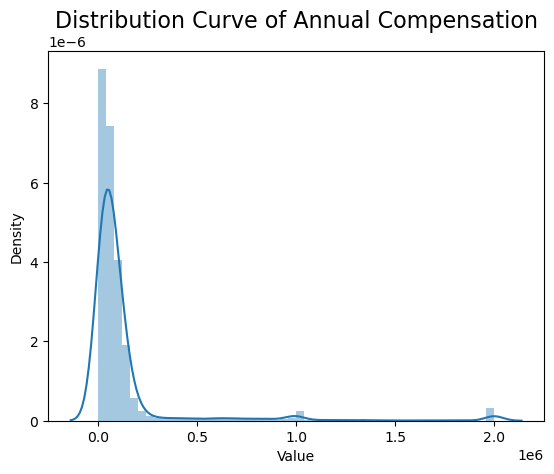

In [9]:
sns.distplot(df['ConvertedComp'], kde=True)
plt.title('Distribution Curve of Annual Compensation', fontsize=16)
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

### Plot the histogram for the column ConvertedComp.

C:\Users\Steven\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


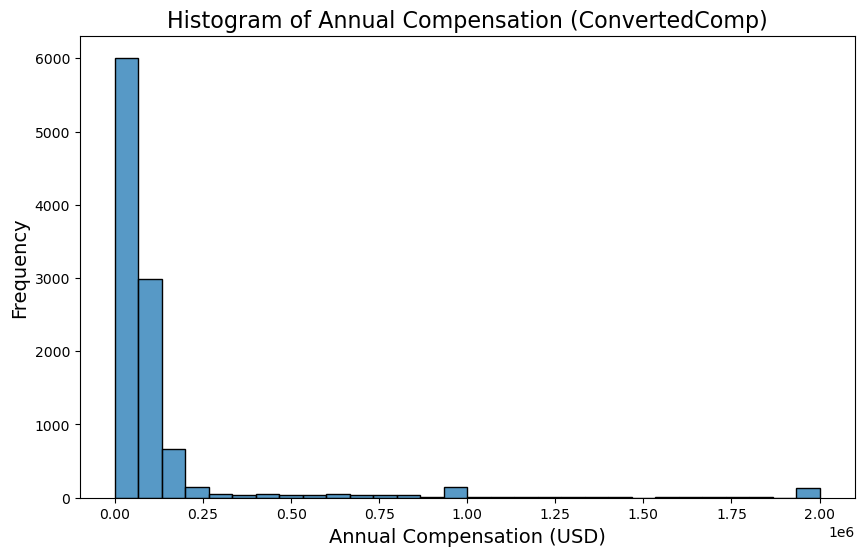

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'].dropna(), bins=30)

# Adding labels and title
plt.title('Histogram of Annual Compensation (ConvertedComp)', fontsize=16)
plt.xlabel('Annual Compensation (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()

In [11]:
median_value = df['ConvertedComp'].median()

In [12]:
print(median_value)

57745.0


### How many responders identified themselves only as a Man?

In [13]:
count_man= df['Gender'].eq('Man').sum()
print(count_man)

10480


### Find out the median ConvertedComp of responders identified themselves only as a Woman?

In [14]:
women_responders = df[df['Gender'] == 'Woman']

median_women_comp = women_responders['ConvertedComp'].median()

print(median_women_comp)

57708.0


### Give the five number summary for the column Age?

In [15]:
min_age = df['Age'].min()
q1_age = df['Age'].quantile(0.25)
median_age = df['Age'].median()
q3_age = df['Age'].quantile(0.75)
max_age = df['Age'].max()

print(min_age, q1_age, median_age, q3_age, max_age)

16.0 25.0 29.0 35.0 99.0


### Plot a histogram of the column Age.

C:\Users\Steven\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


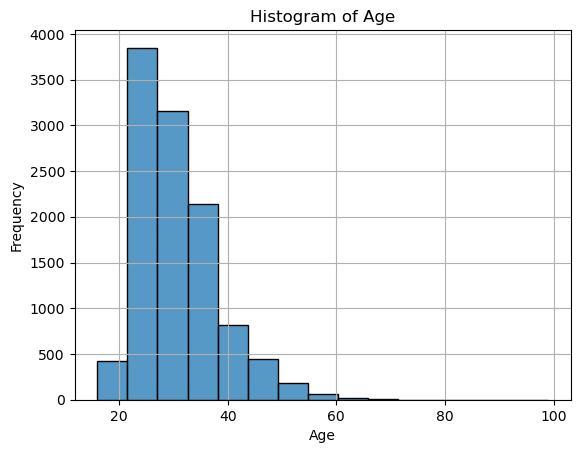

In [16]:


sns.histplot(df['Age'], bins=15)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

## Outliers
### Finding outliers
Find out if outliers exist in the column `ConvertedComp` using a box plot?

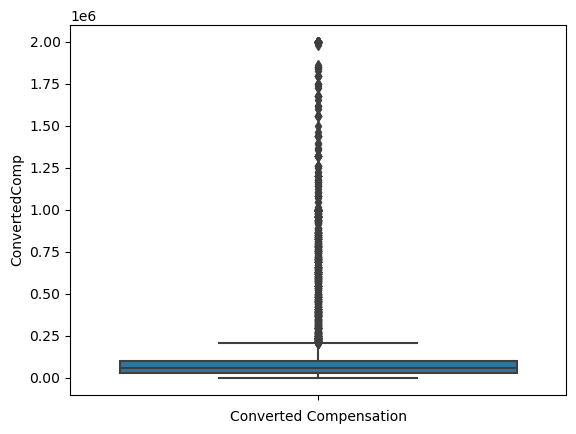

In [17]:
sns.boxplot(y=df['ConvertedComp'])
plt.xlabel('Converted Compensation')
plt.show()

### Find out the Inter Quartile Range for the column ConvertedComp.

In [18]:
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
IQR = q3 - q1
print(IQR)

73132.0


### Find out the upper and lower bounds.

In [19]:
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

print(f"{lower_bound} : {upper_bound}")

-82830.0 : 209698.0


### Identify how many outliers are there in the `ConvertedComp` column.


In [20]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

num_outliers = outliers.shape[0]
print(num_outliers)

879


In [21]:
outliers = df[(df['ConvertedComp'] < lower_bound)]

num_outlier_below_q1 = outliers.shape[0]
print(num_outlier_below_q1)

0


### Create a new dataframe by removing the outliers from the ConvertedComp column.

In [22]:
new_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print(new_df)

       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11392       25134  I am a developer by profession      Yes   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than once per ...   
4      Less tha

## Correlation
### Finding correlation
Find the correlation between `Age` and all other numerical columns.

In [23]:
numeric_df = new_df.select_dtypes(include=['number'])

correlation = numeric_df.corr()

age_correlation = correlation['Age']
print(age_correlation)

Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64
